In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

[  2. 136.  92.   1.   0.   5.   6.   0.  20.  83.   9.   0.   0.   1.
   3.   2.   2.   0.   0.   0.   0.   6.   5.   1.   0.   0.   0.   0.
   0.   0.   0.   0.  34. 104.  19.   9.  81. 137.  47.   3. 137. 137.
   3.   2.  10.  10.  10.  17.  33.   3.   0.   6.  30.  50.  18.  10.
   0.   0.   0.   1.   6.   5.   0.   0.  58.   4.   0. 137. 137.  37.
   5.  47. 137.  20.   4.  19.  15.   2.   0. 123.  41.   5.   5.  58.
  39.   7.   1.   5.   0.   0.   0.   5.   7.   1.   0.   0.  70.   0.
   0.  88.  38.   0.   0. 137.  81.   1.   2.  18.   4.   0.   0. 136.
   3.   0.   1.  23.   5.   0.   0.   1.   0.   0.   0.   1.   0.   0.
   0.   0.] (6.013952255249023, 33.52520751953125)
15 187 199.80490112304688 15 85 317.40509033203125 0
27 150 194.984619140625 27 134 269.4067687988281 0
29 176 143.31085205078125 29 174 329.4465026855469 0
30 177 139.16177368164062 30 181 349.6669921875 0
52 155 193.98968505859375 52 147 292.7165832519531 0
53 194 168.36863708496094 53 149 296.3055725097656

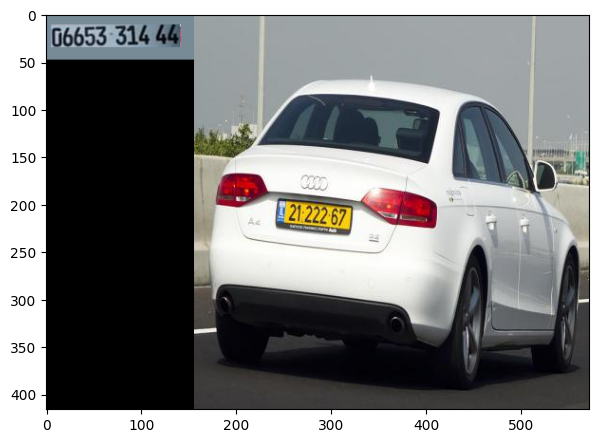

Nombre de bons matches : 18


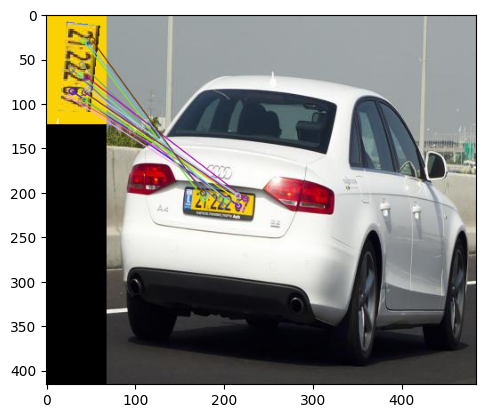

In [ ]:
query = cv.imread('query.png')
query2 = cv.imread('matricule1.png')
train = cv.imread('voit1.jpg')

query_gray= cv.cvtColor(query,cv.COLOR_BGR2GRAY)
query2_gray = cv.cvtColor(query2 , cv.COLOR_BGR2GRAY)
train_gray= cv.cvtColor(train,cv.COLOR_BGR2GRAY)


sift = cv.SIFT_create()
query_kp = sift.detect(query_gray,None)
query2_kp = sift.detectAndCompute(query2_gray , None)
train_kp = sift.detect(train_gray, None)




kp1, des1 = sift.detectAndCompute(query_gray,None)
kp2, des2 = sift.detectAndCompute(train_gray,None)
kp3, des3 = sift.detectAndCompute(query2_gray,None)
print(des1[0],kp1[0].pt)

bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
matches2 = bf.knnMatch(des3,des2, k=2)

good1 = []
good2 = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        print(m.queryIdx, m.trainIdx, m.distance, n.queryIdx, n.trainIdx, n.distance, n.imgIdx)
        good1.append([m])

for m,n in matches2:
    if m.distance < 0.75*n.distance:
        print(m.queryIdx, m.trainIdx, m.distance, n.queryIdx, n.trainIdx, n.distance, n.imgIdx)
        good2.append([m])


plt.figure(figsize=(7,8))

img3 = cv.drawMatchesKnn(query,kp1,train,kp2,good1, None, flags=2)
print("Nombre de bons matches :", len(good1))
plt.imshow(img3 if img3.ndim==2 else cv.cvtColor(img3, cv.COLOR_BGR2RGB))

plt.show()

result2= cv.drawMatchesKnn(query2,kp3,train,kp2,good2, None, flags=2)
print("Nombre de bons matches :", len(good2))
plt.imshow(result2 if result2.ndim==2 else cv.cvtColor(result2, cv.COLOR_BGR2RGB))




plt.show()